In [1]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa.display
import sklearn
from sklearn import preprocessing
import soundfile as sf

audio_data = 'MileEnd-HydePark-NoStops.wav'

## Loading the Data
The sample rate is 22050 Hertz. There are a total of 55,080,989 data points in the audio. This amounts to 41 mins and 38 seconds.

In [2]:
x, sr = librosa.load(audio_data, sr=22050)
#<class 'numpy.ndarray'> <class 'int'>
print(x.shape)

(55080989,)


## Average Amplitude per Minute
The following code works out the average amplitude per minute of audio. Amplitude measures the energy transferred by a (sound) wave, by using the distance between the peak or trough of the wave and the equilibrium position. This is traditionally measured in metres, but in electronic audio it does not have a unit as it is relative to wave.

Text(0, 0.5, 'Amplitude')

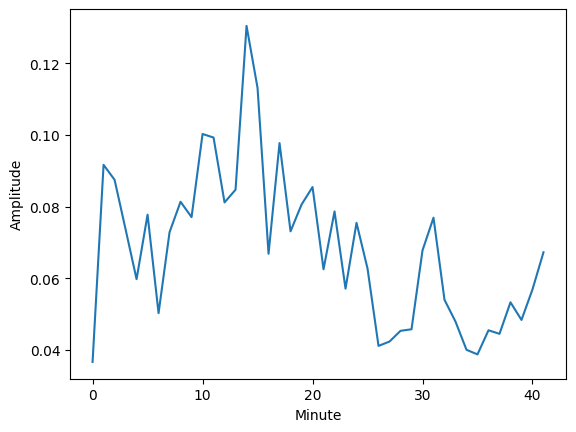

In [9]:
minsample = 1323000 #the number of data points in a minute of audio
amplitude = np.zeros(42)
for i,v in enumerate(amplitude):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)
    #print(current_sample,prev_sample,i)
    help = sum(np.abs(x[prev_sample:current_sample]))
    amplitude[i] = help/len(x[prev_sample:current_sample])

plt.plot(amplitude)
plt.xlabel('Minute')
plt.ylabel('Amplitude')

## Average Decibels per Minute
The following code works out the average decibel per minute of audio, after being adjusted. Decibels are a relative measure of sound, like Celsius or Farenheit, on a logarithmic scale. They are a measure of loudness or intensity of sound, using a combination of amplitude and pressure.

In [10]:
decibels = np.zeros(42)

for i,v in enumerate(decibels):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)
    
    X = librosa.stft(x[prev_sample:current_sample])
    decibels[i] = np.mean((librosa.amplitude_to_db(np.abs(X))+90))

decibels

array([59.84457779, 67.41614532, 66.47983551, 62.6254158 , 63.54726791,
       64.03329468, 60.96144485, 63.09964371, 66.13509369, 64.44591522,
       66.30845642, 67.45141602, 66.05596161, 66.49282837, 67.50933075,
       66.75390625, 64.06181335, 65.12365723, 61.34561539, 62.29041672,
       63.17158508, 61.39211273, 61.50245285, 59.59703445, 63.1914711 ,
       61.55485535, 58.04174805, 60.70869064, 61.19770432, 58.67836761,
       61.27458191, 60.99975967, 58.33916092, 58.19395065, 58.20580673,
       56.36810303, 57.45288086, 58.43606949, 60.99172211, 58.89051819,
       62.92215347, 62.10432053])

Text(0, 0.5, 'Decibels')

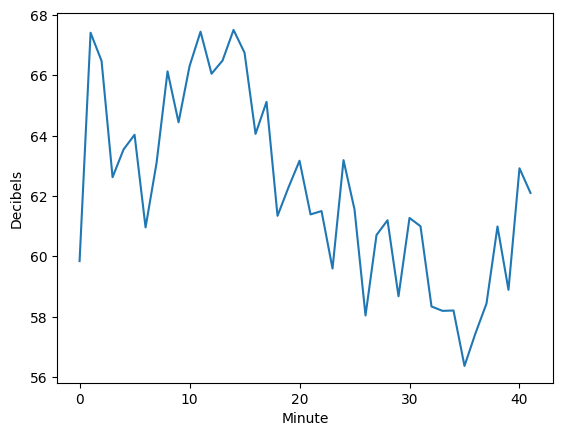

In [11]:
plt.plot(decibels)
plt.xlabel('Minute')
plt.ylabel('Decibels')

## Zero Crossings per Minute
Zero Crossings refer to the number of times the audio signal crosses from either positive to negative or negative to positive, passing the equilibrium, or zero, point. This is used to classify percussive sounds, and acts as a proxy here for the smoothness of the road.

In [13]:
zero_crossings = np.zeros(42)

for i,v in enumerate(zero_crossings):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)

    zero_crossings[i] = sum(librosa.zero_crossings(x[prev_sample:current_sample], pad=False))
print(zero_crossings)

[29242. 40940. 37392. 37170. 29361. 29912. 32263. 35920. 37081. 40223.
 34167. 40793. 36288. 30907. 37620. 37592. 34183. 33628. 24554. 28098.
 30637. 32545. 29869. 28276. 39045. 28991. 32247. 29338. 32386. 36562.
 37856. 27624. 27029. 25827. 25775. 19501. 18666. 25856. 32687. 34298.
 39944. 17310.]


Text(0, 0.5, 'Zero Crossings')

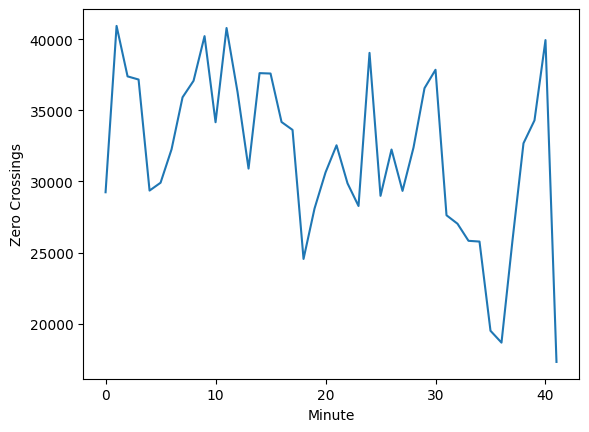

In [16]:
plt.plot(zero_crossings)
plt.xlabel('Minute')
plt.ylabel('Zero Crossings')

## Average Pitch per Minute
Pitch is a measure of the frequency of vibrations and classifies how we perceive different frequencies. Here, the relative pitch is calculated per minute, showing the sound of the road.

In [15]:
chromagram = np.zeros(42)

for i, v in enumerate(chromagram):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)

    chromagram[i] = np.mean(librosa.feature.chroma_stft(y=x[prev_sample:current_sample], sr=sr))
print(chromagram)

[0.63063478 0.56342047 0.57276601 0.60124403 0.59138453 0.57722938
 0.63144404 0.60627812 0.62147987 0.58897811 0.57656801 0.60101146
 0.6347937  0.64500165 0.60632163 0.56847447 0.62088692 0.62030256
 0.61816001 0.57296175 0.58738416 0.62478119 0.61103594 0.61725152
 0.58363575 0.60606259 0.61186028 0.63512528 0.6205337  0.63108116
 0.59911907 0.59384483 0.61340982 0.60154945 0.61815536 0.66939509
 0.65587121 0.56541938 0.60371459 0.59943467 0.62080425 0.6182518 ]


Text(0, 0.5, 'Relative Pitch')

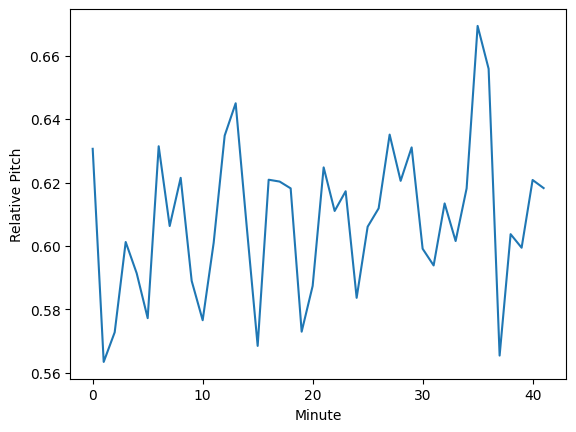

In [14]:
plt.plot(chromagram)
plt.xlabel('Minute')
plt.ylabel('Relative Pitch')

## Average Spectral Centroids per Minute
Sepctral Centroids characterise where the centre of mass of a spectrum is located. ['Each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame.'](https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html)
This translates roughly to the timbre of a sound, which is different depending on the source of the sound (e.g., human voice has different timbre to a violin, at the same note.) This is indicative of whether the sound is generated by humans or machines.

In [20]:
spectral_centroids = np.zeros(42)

for i,v in enumerate(spectral_centroids):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)
    spectral_centroids[i] = np.mean(librosa.feature.spectral_centroid(y=x[prev_sample:current_sample], sr=sr)[0])
    # frames = range(len(spectral_centroids))
    # t = librosa.frames_to_time(frames)
    # def normalize(x, axis=0):
    #     return sklearn.preprocessing.minmax_scale(x, axis=axis)
    # plt.plot(t, normalize(spectral_centroids[i]), color='r')

print(spectral_centroids)
    
    # plt.close()

[666.33408752 657.37819269 621.67062406 579.70994038 601.74305021
 579.74982535 617.25705239 607.278513   662.08077938 626.32298802
 565.52412338 632.2074916  657.02910637 664.57182499 570.15770386
 578.5761762  591.2338508  559.61399322 510.95369874 514.5381784
 512.18780233 540.63866166 508.02192526 512.93869484 621.15132628
 550.51400745 572.12293991 551.52402508 552.20286301 608.77134957
 556.01683775 465.66082691 498.92334167 517.66222862 536.57864454
 493.23118492 468.74189786 529.53933382 550.56367526 570.78943857
 600.85538949 493.22502726]


Text(0, 0.5, 'Spectral Centroids')

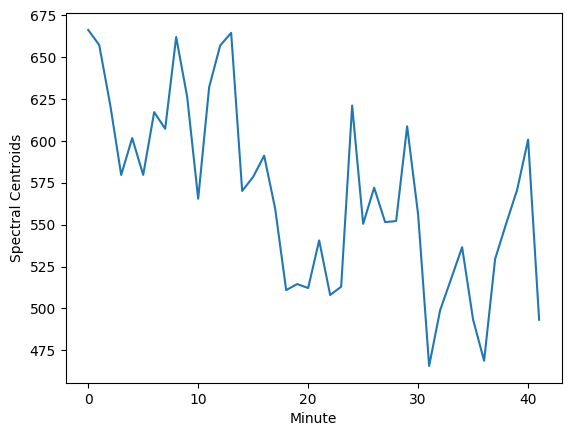

In [18]:
plt.plot(spectral_centroids)
plt.xlabel('Minute')
plt.ylabel('Spectral Centroids')

## Wave Forms
The following code displays the wave form of the audio broken down by minute. No analysis has taken place, but it is interesting to see the variation in the forms through the journey.

C:\Users\Pal\AppData\Local\Temp\ipykernel_19952\4107591217.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 5))


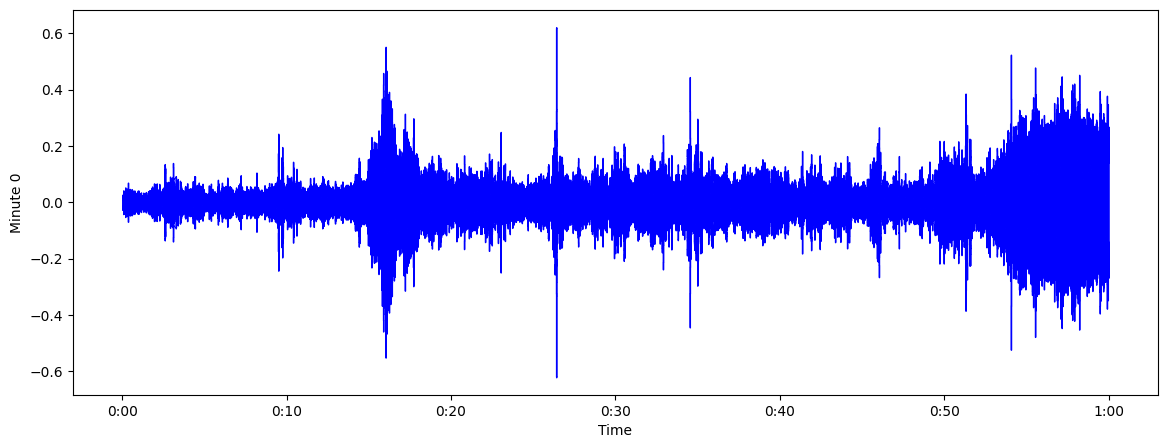

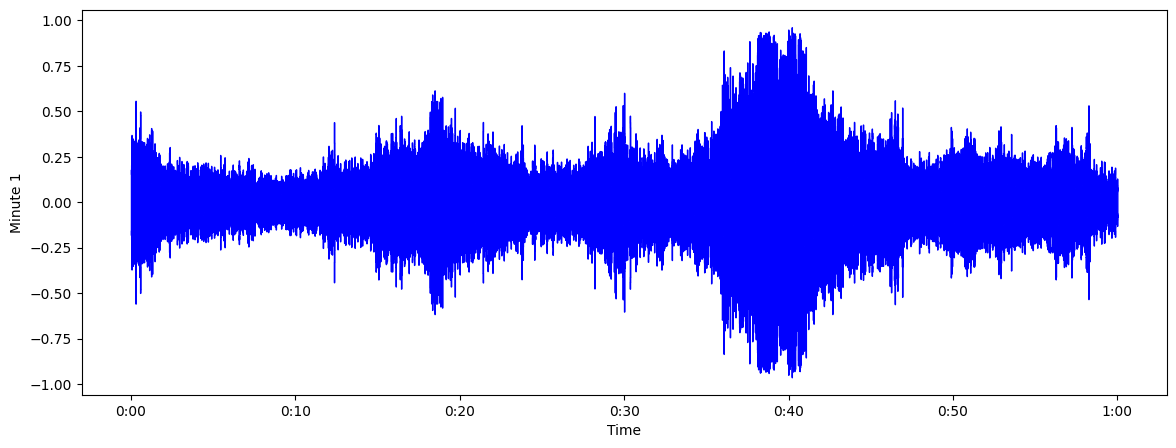

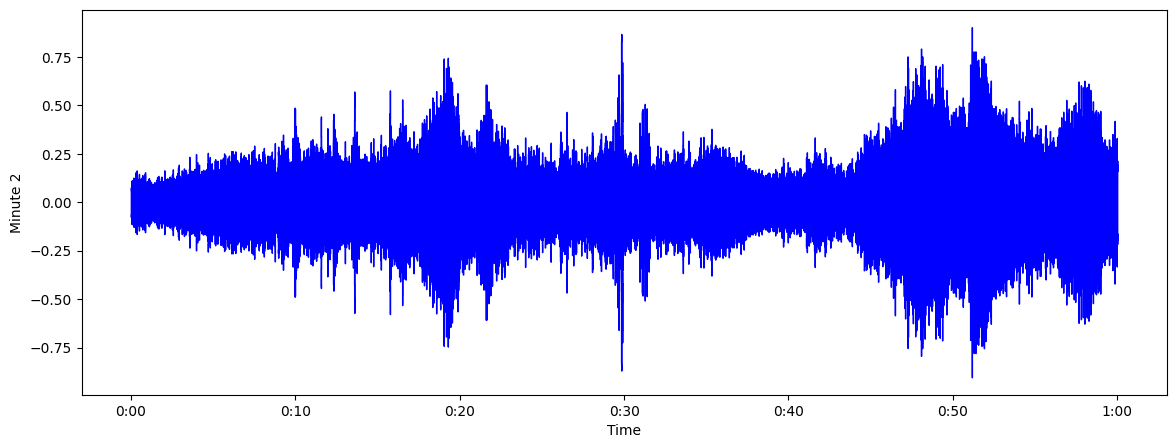

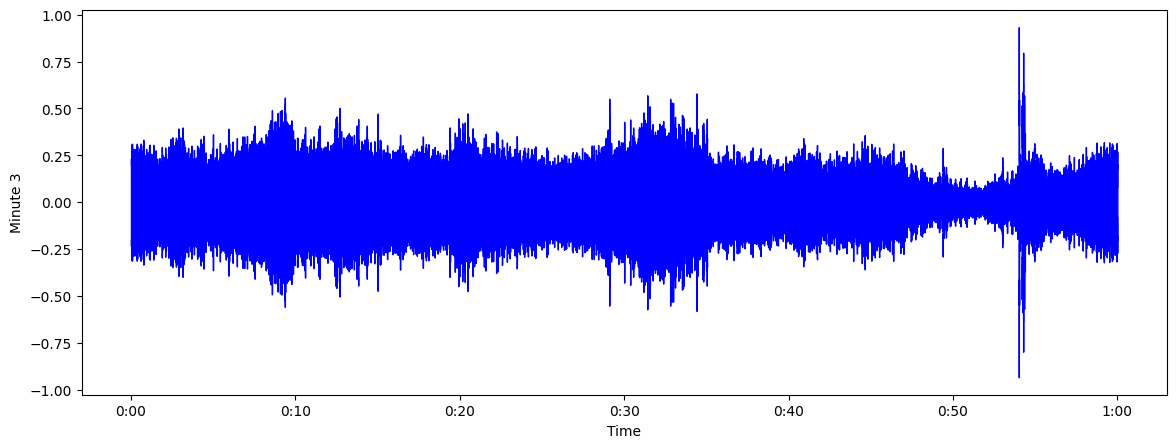

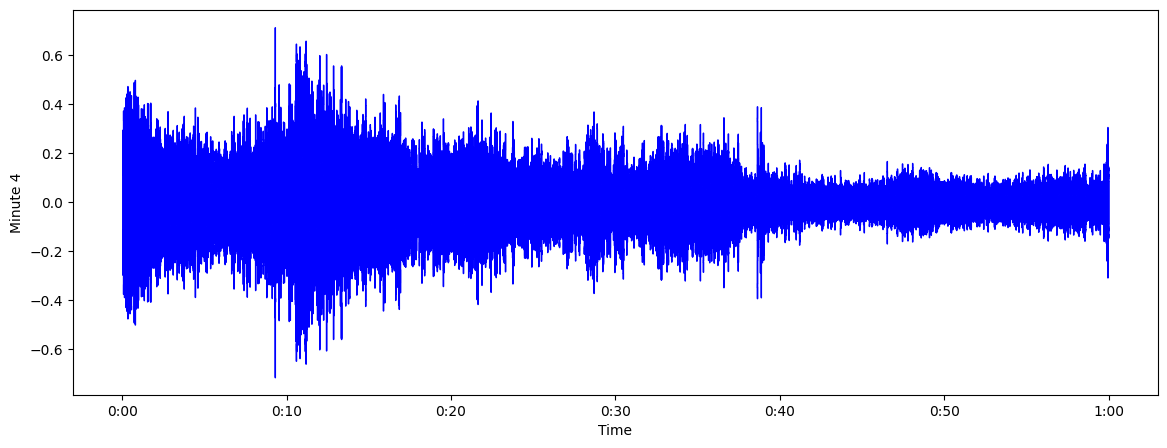

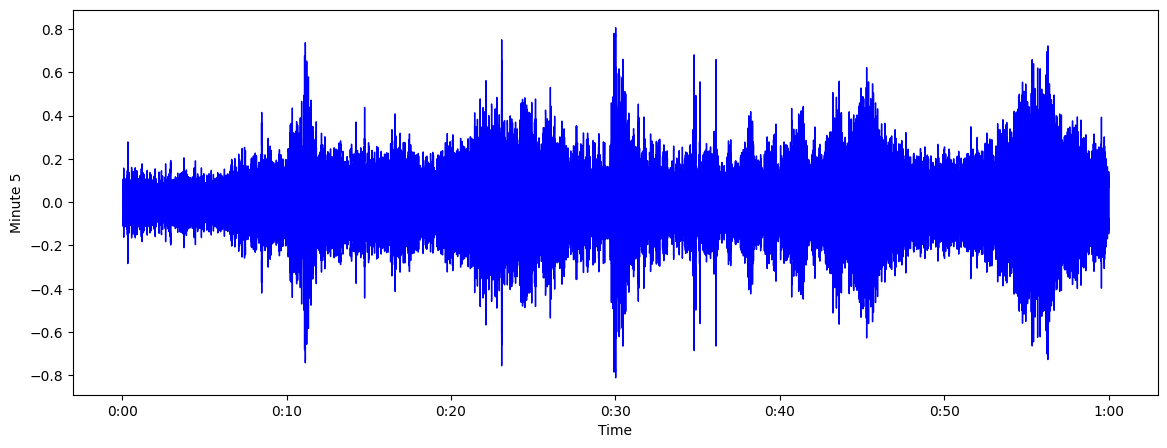

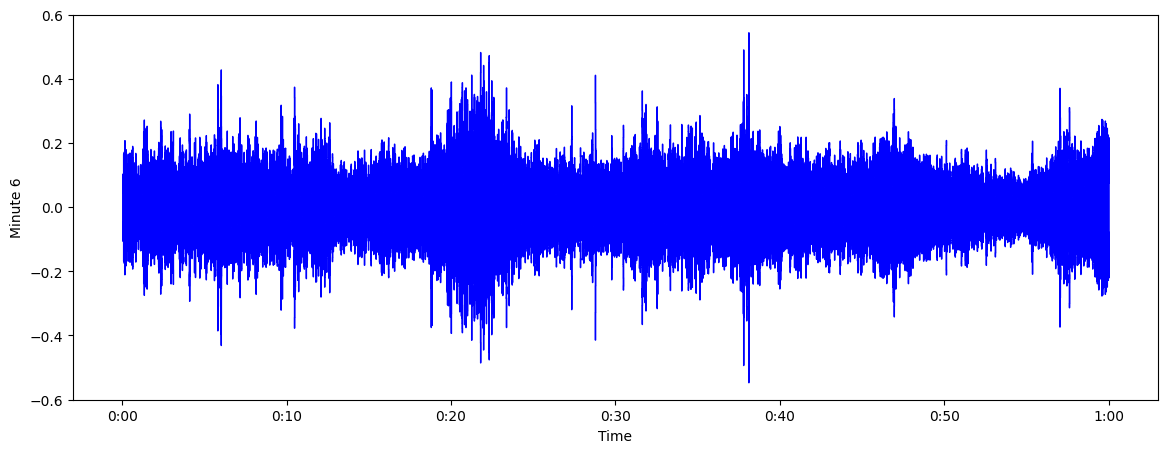

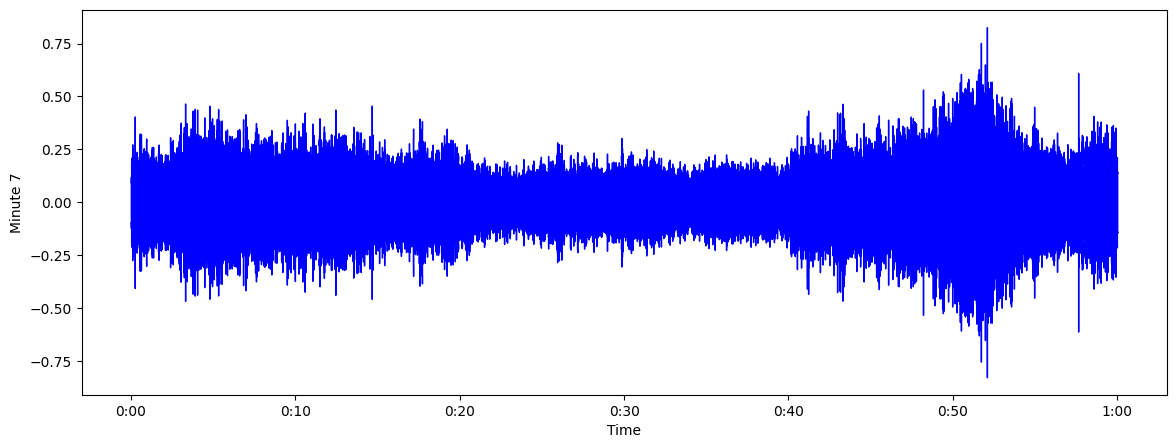

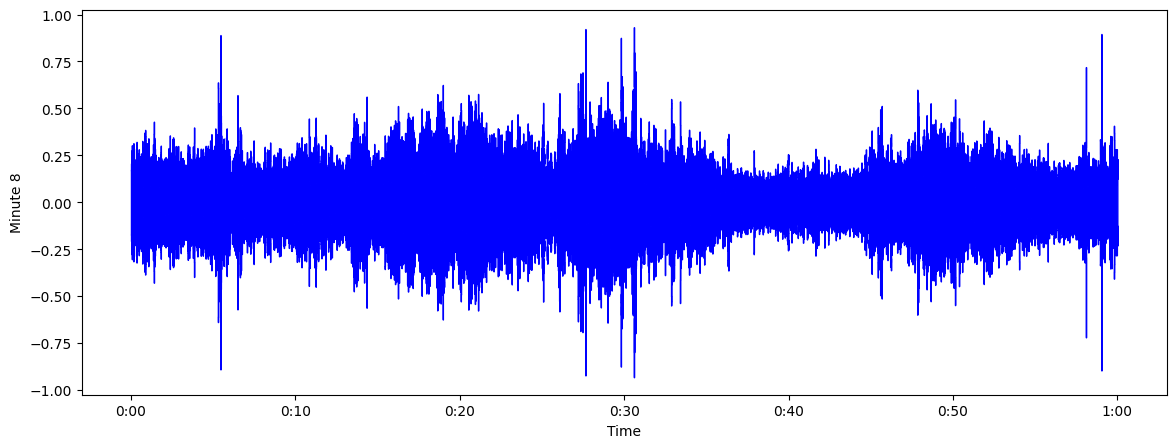

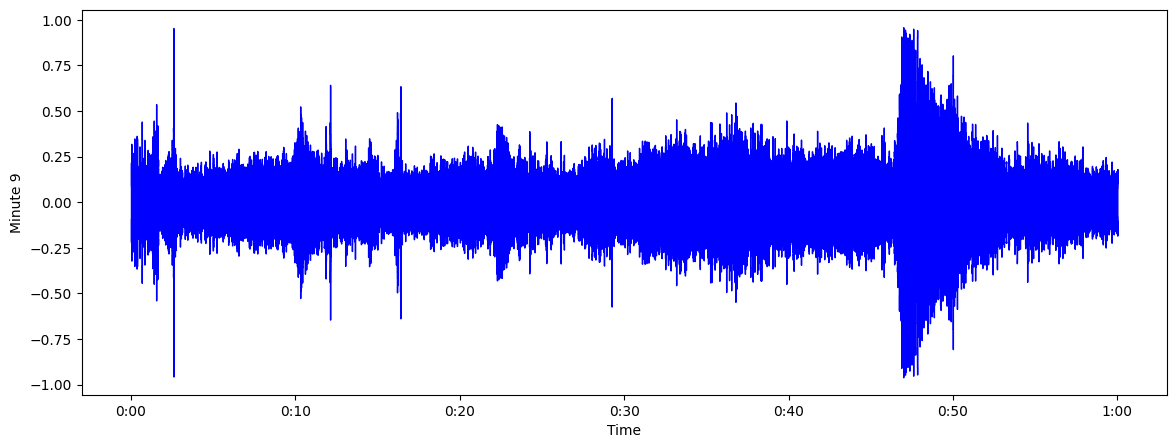

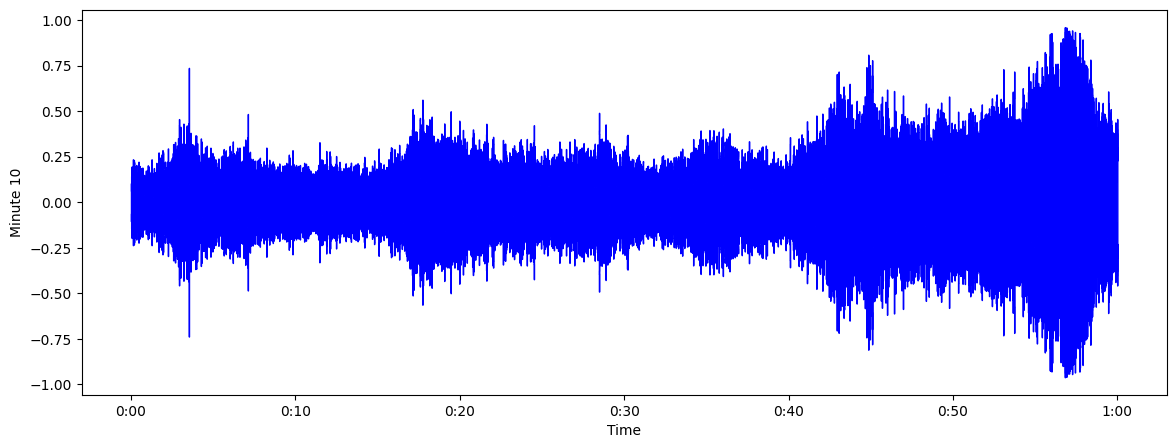

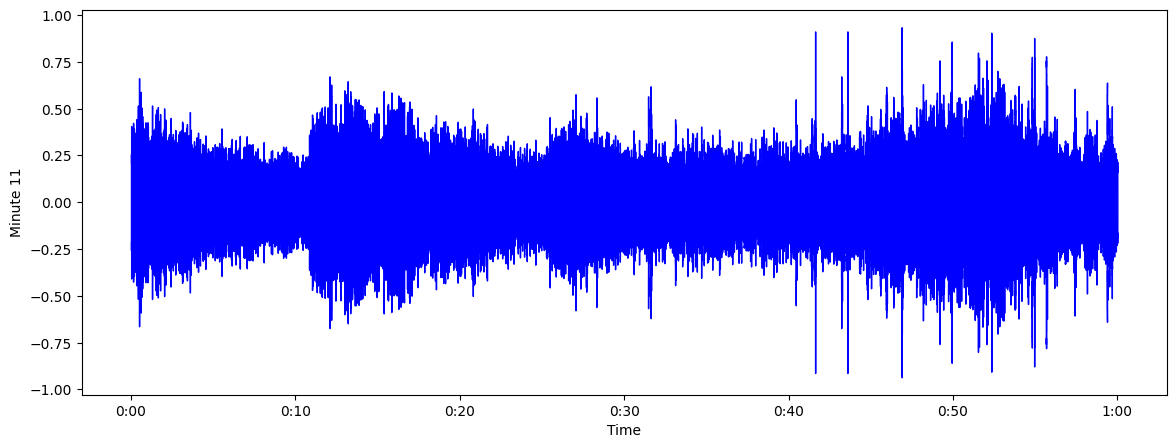

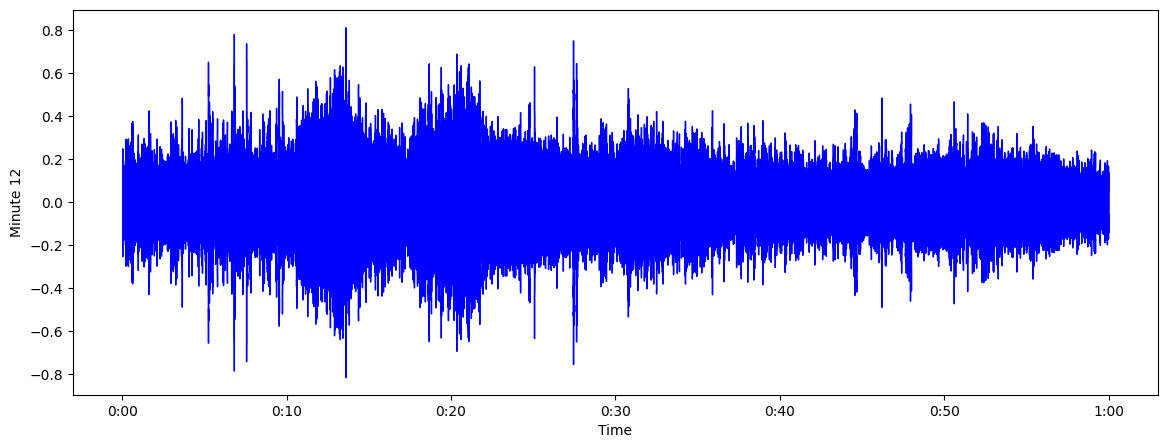

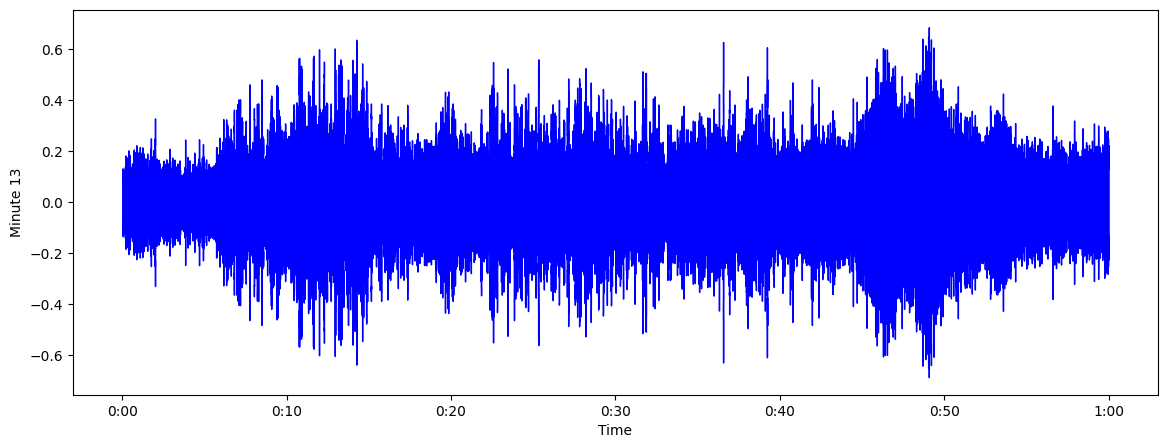

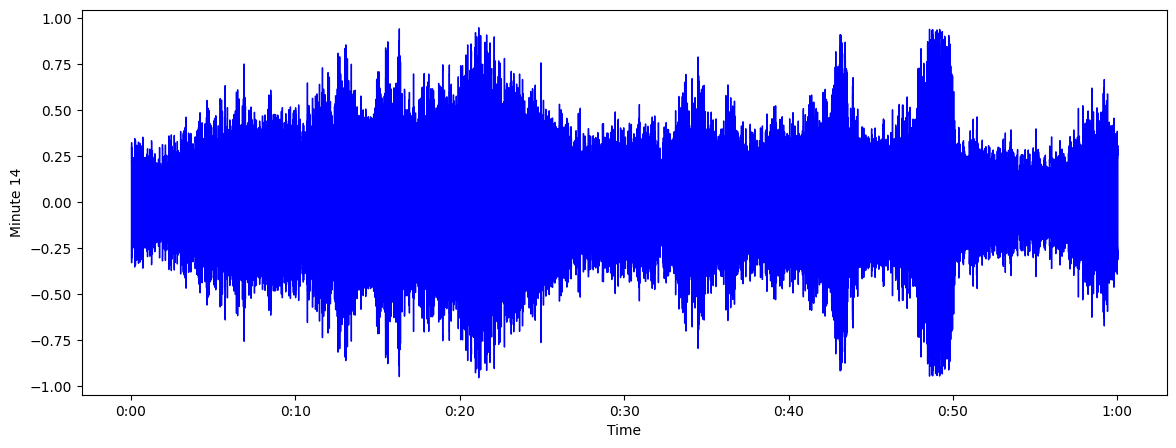

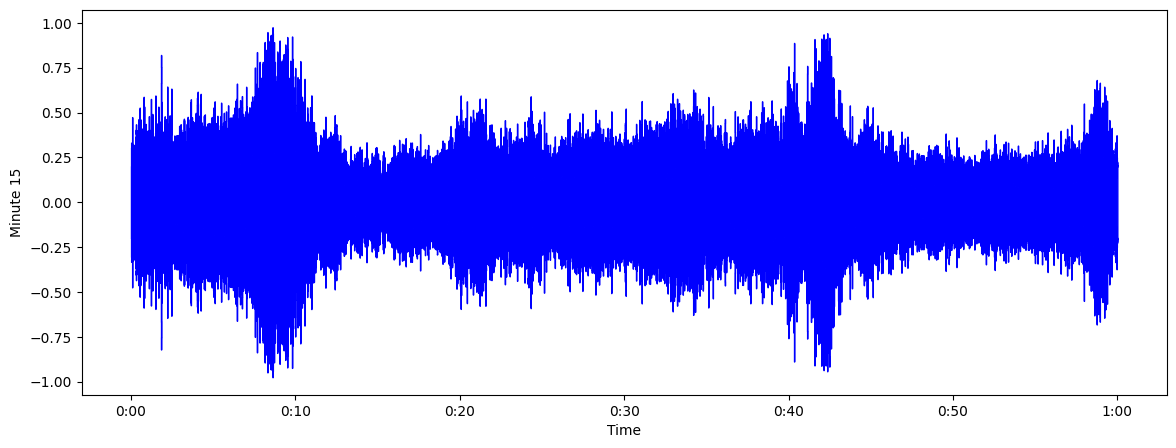

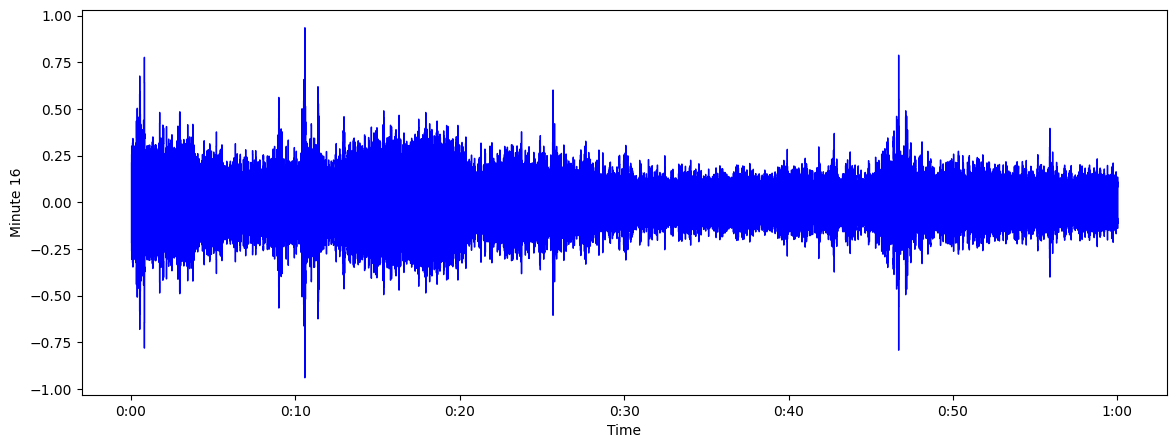

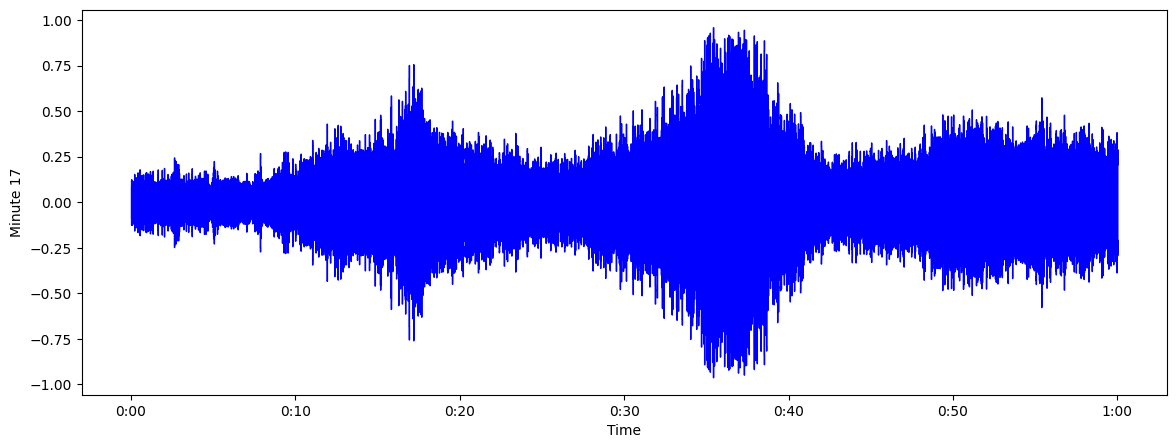

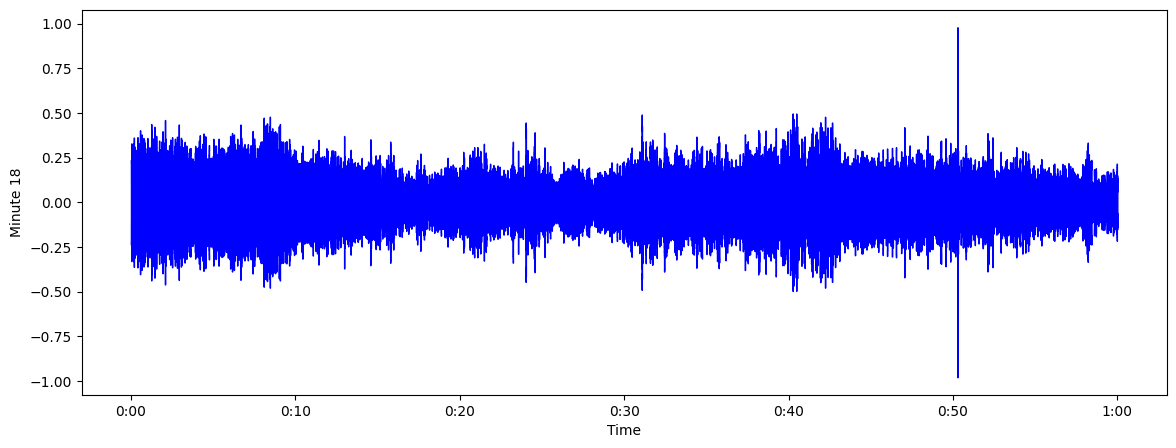

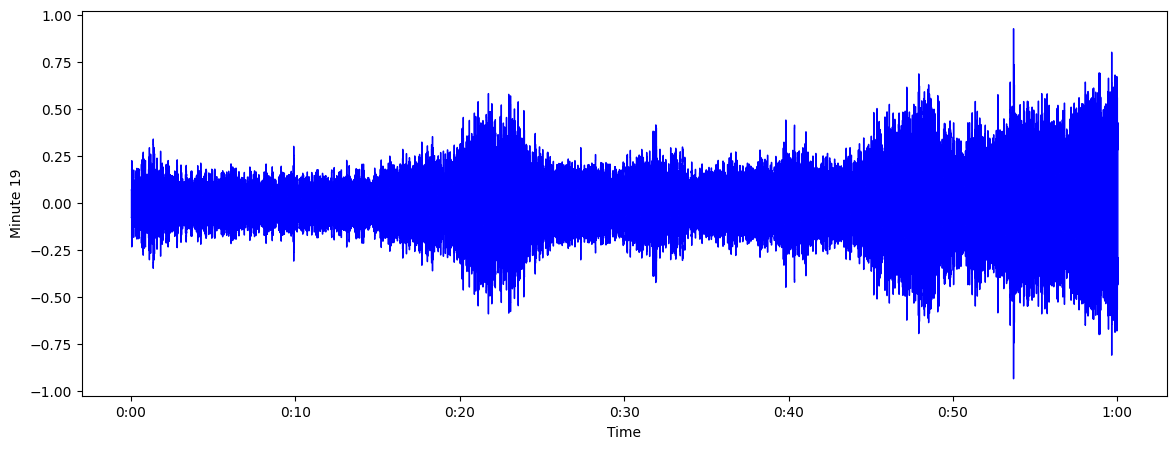

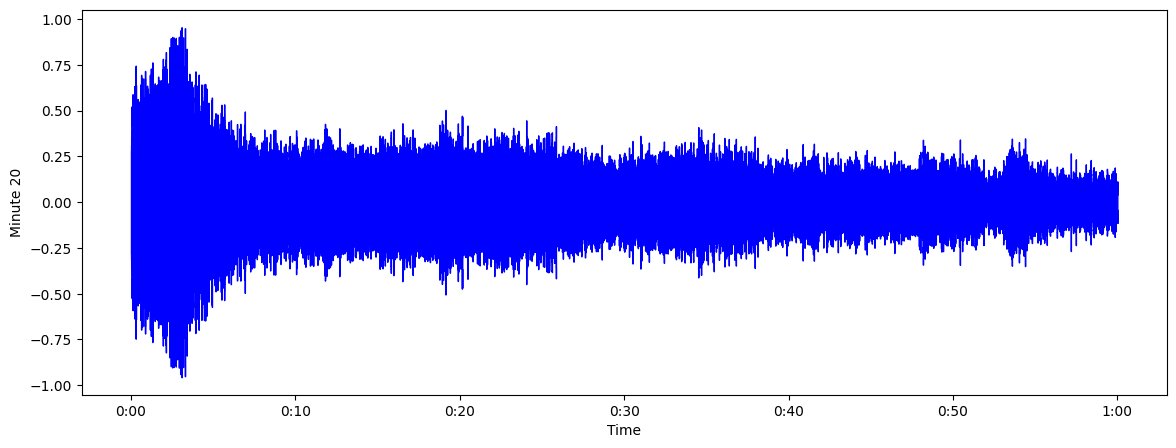

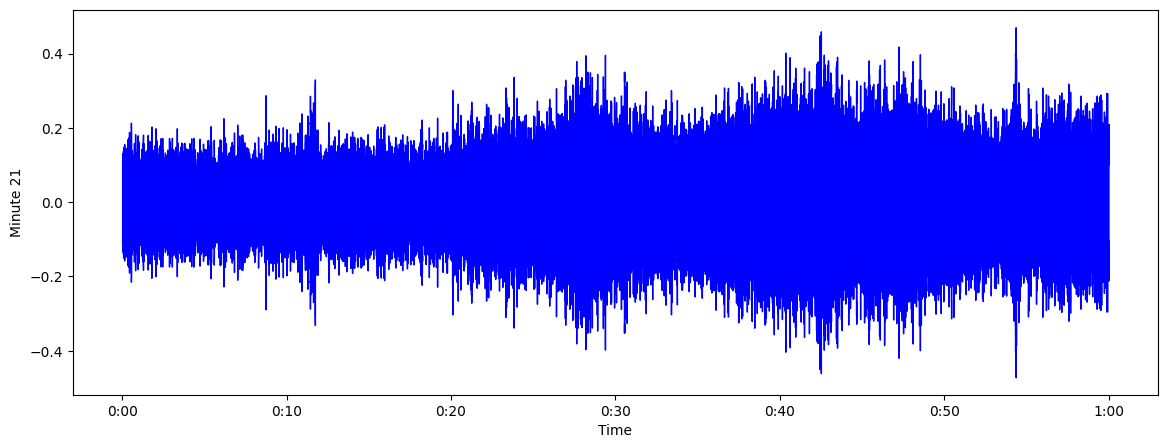

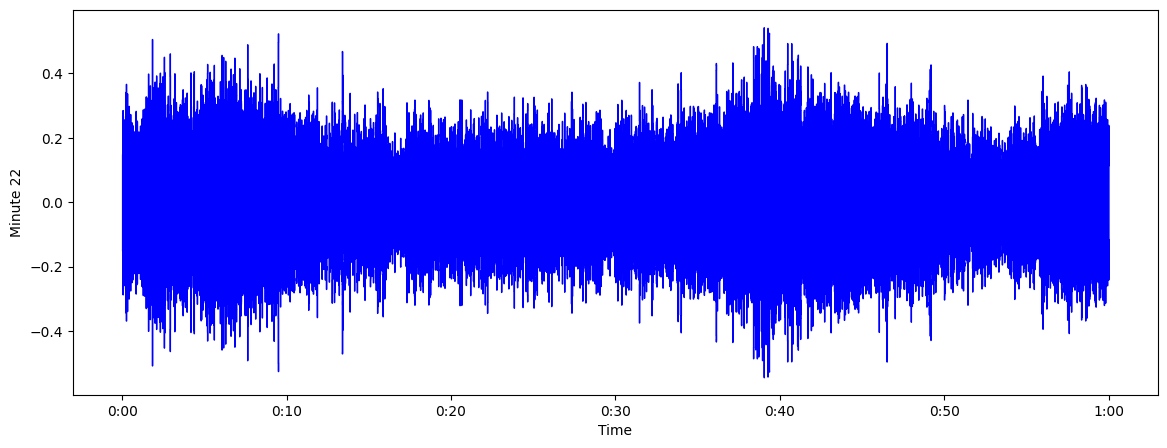

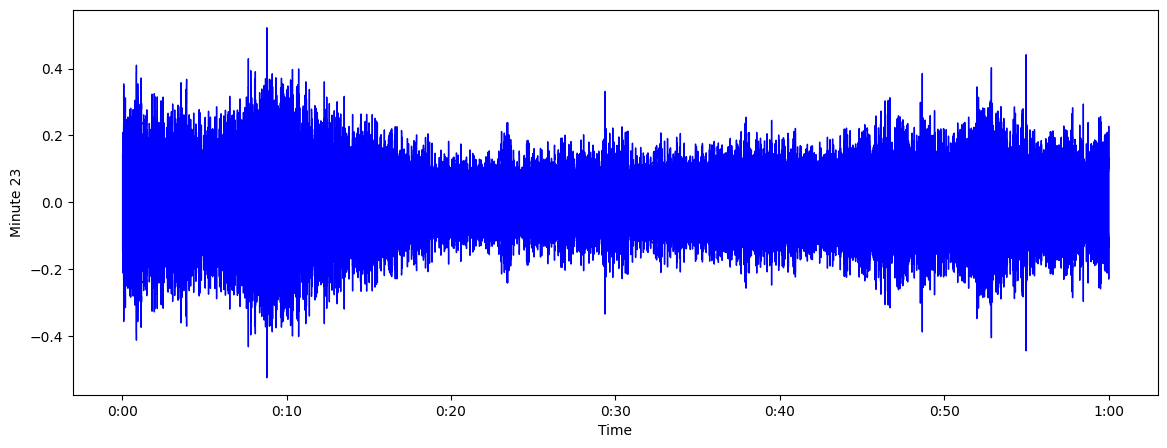

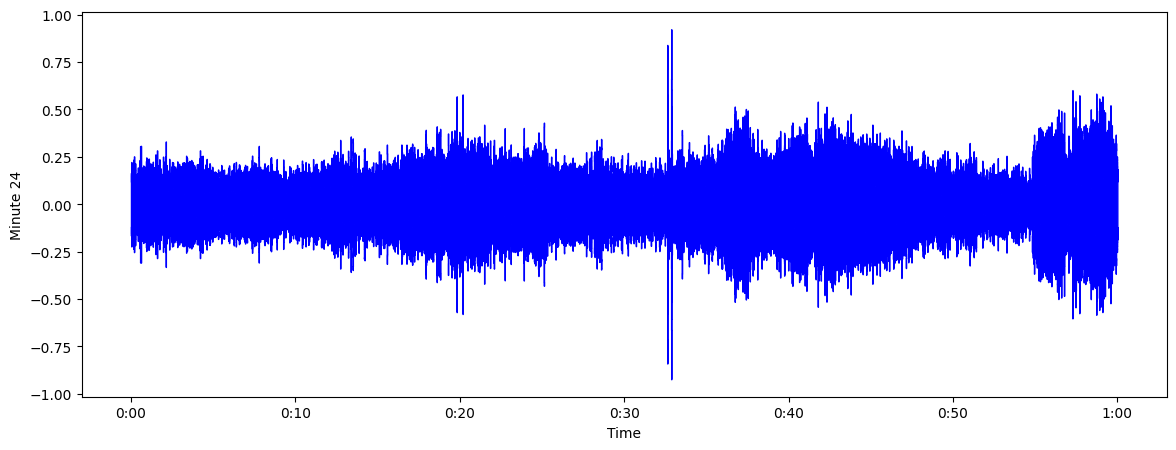

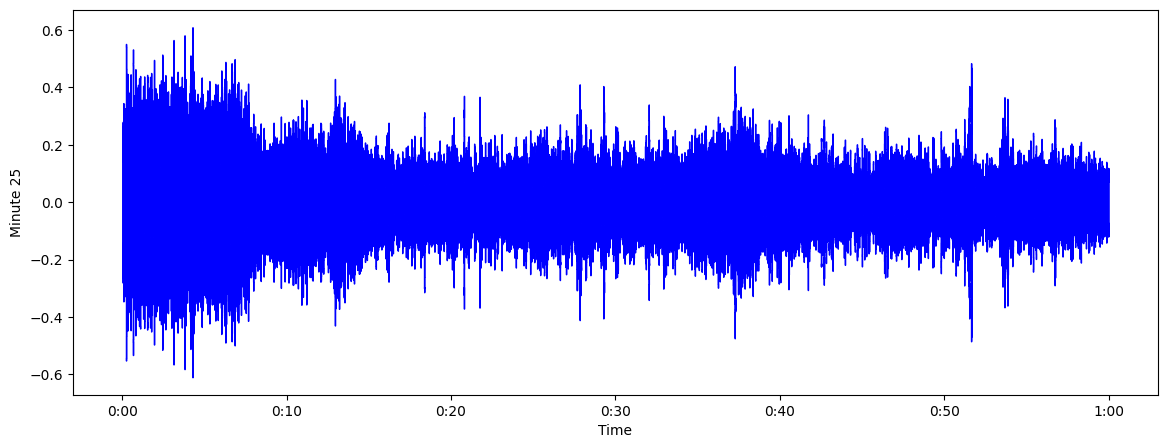

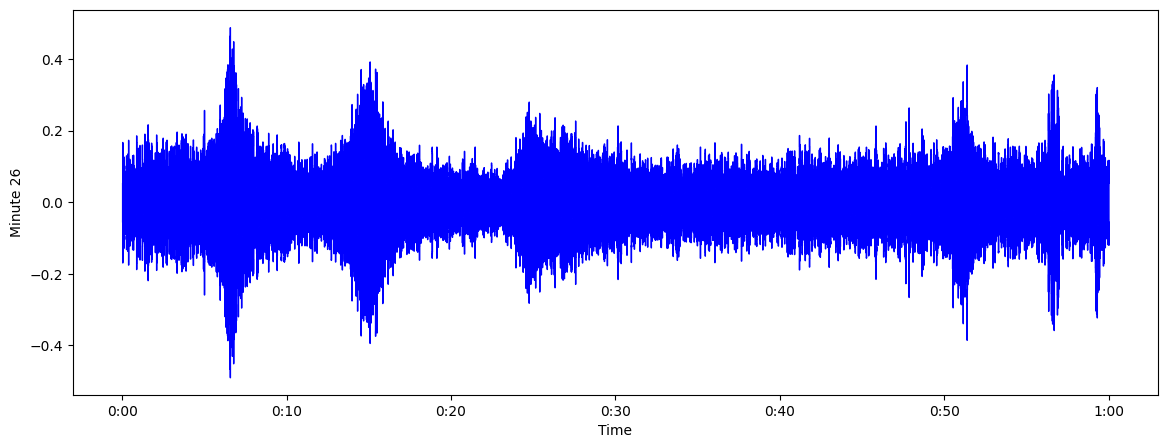

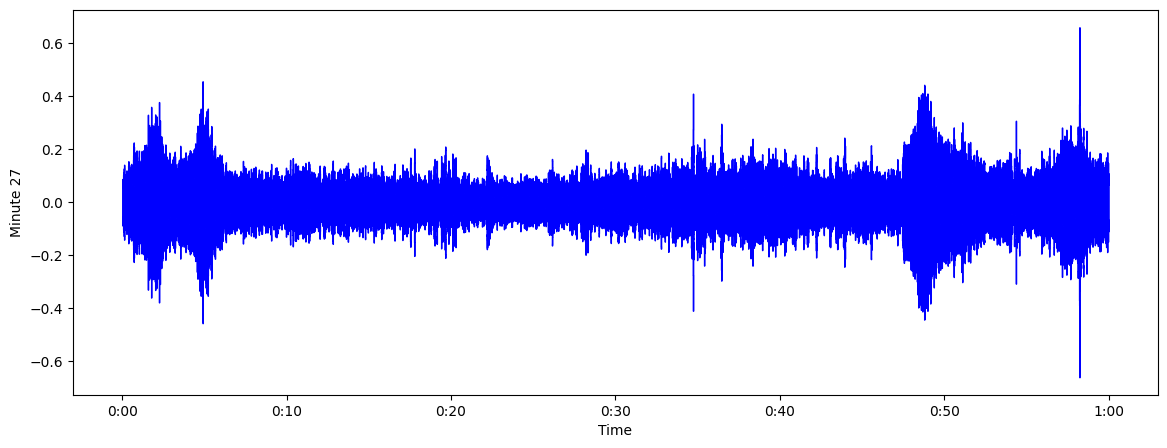

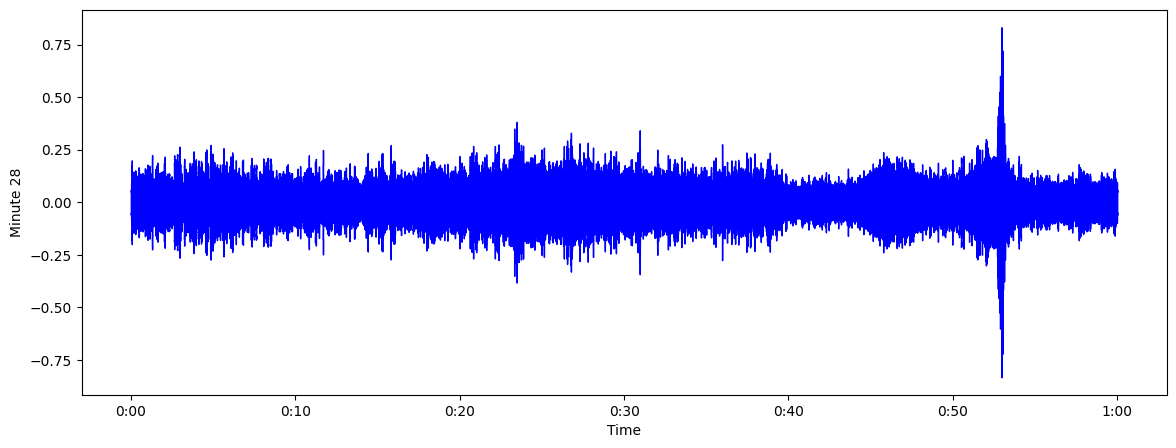

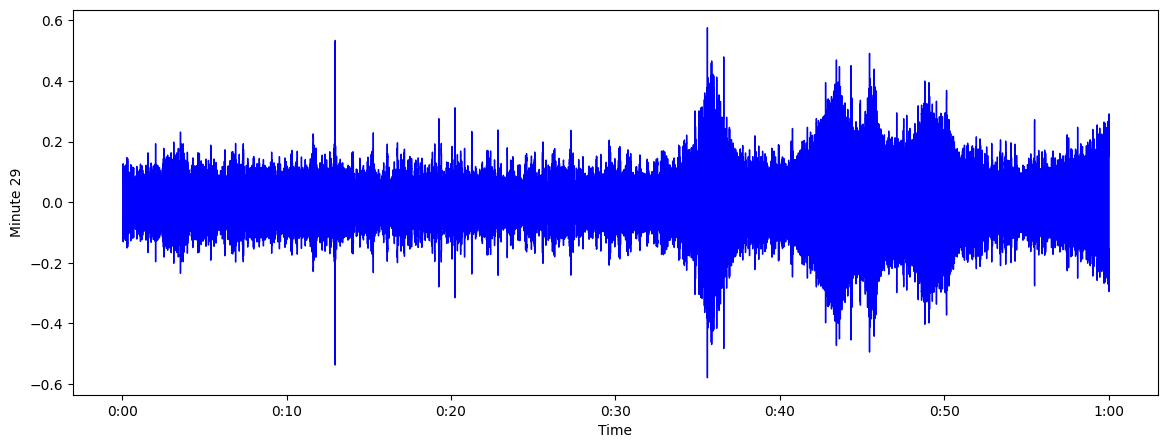

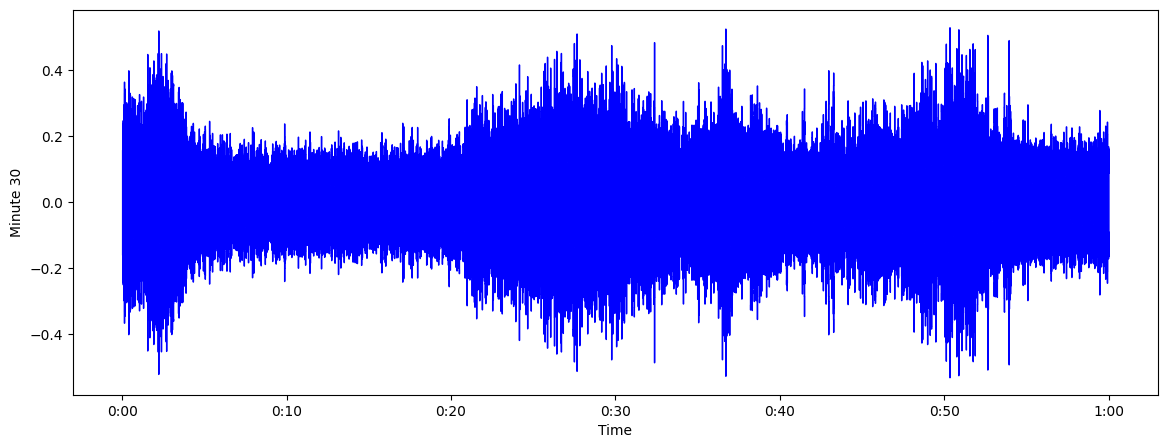

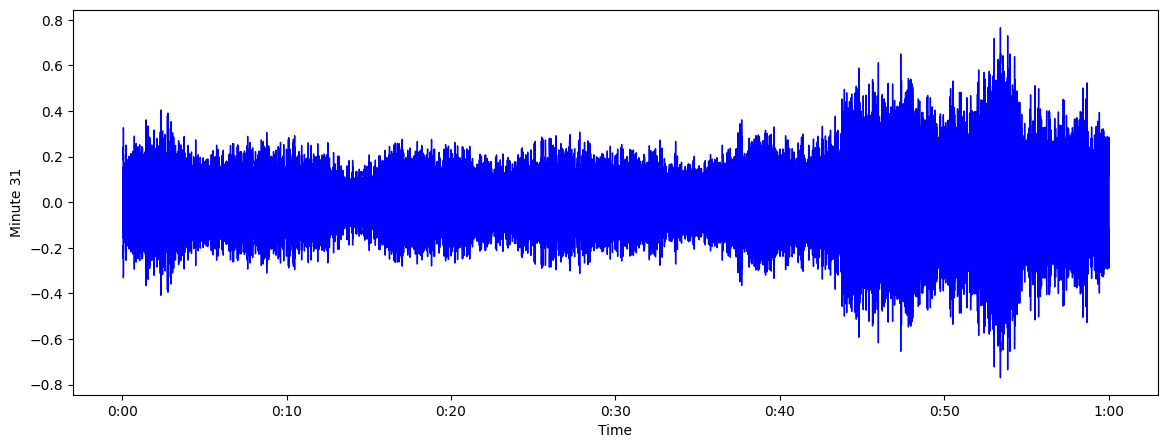

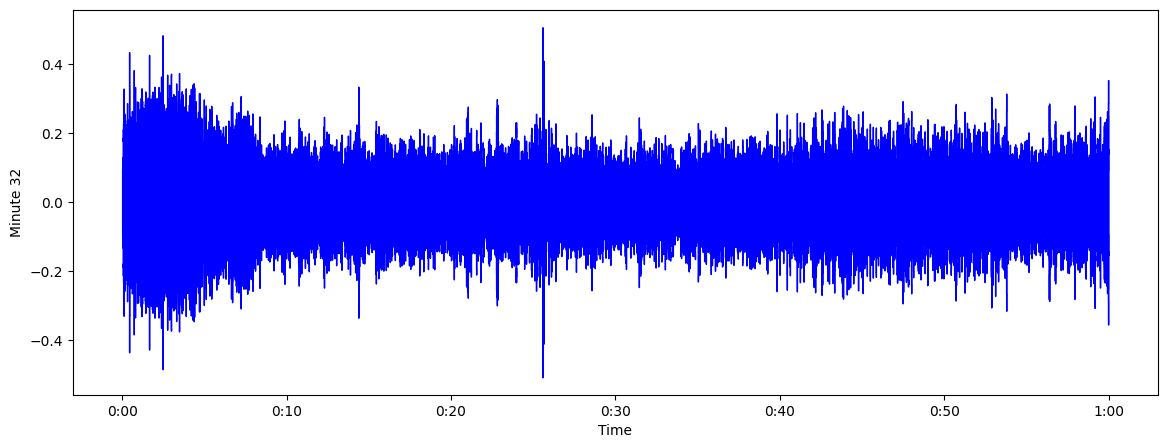

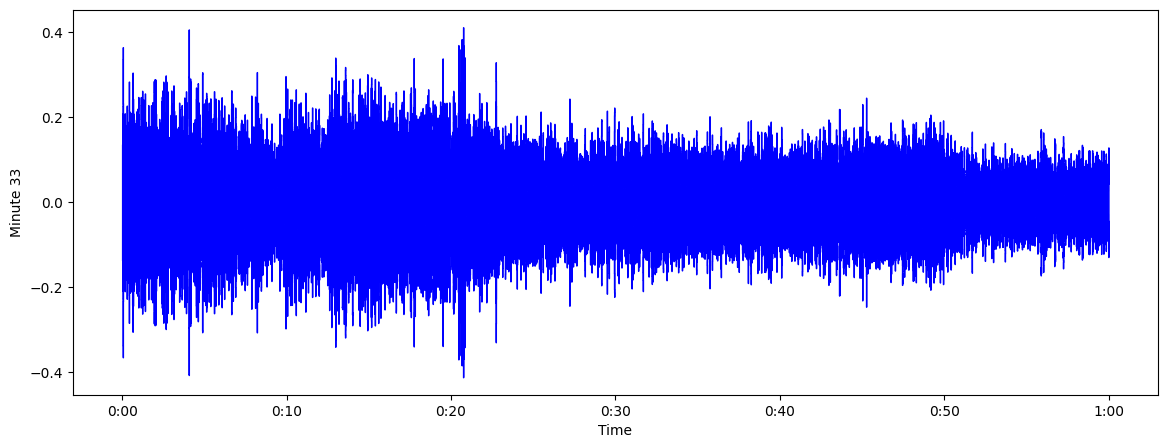

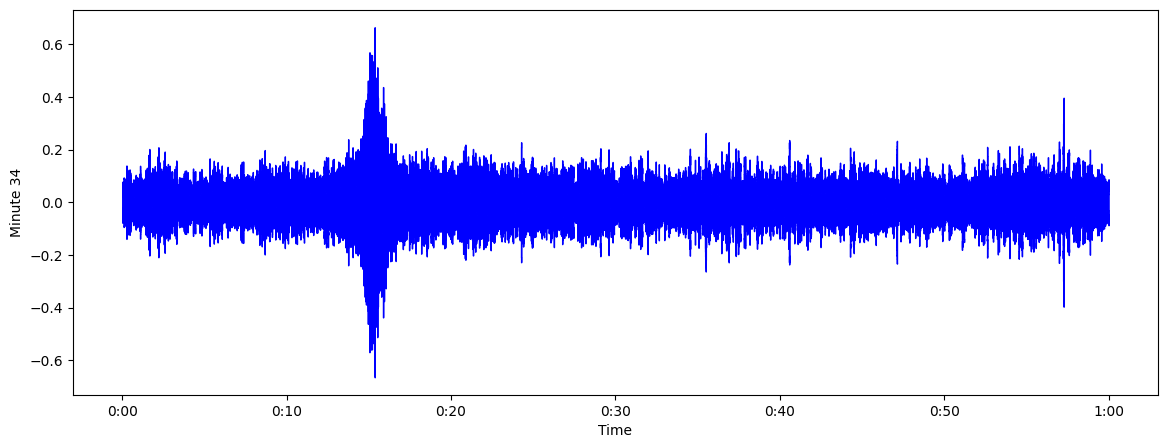

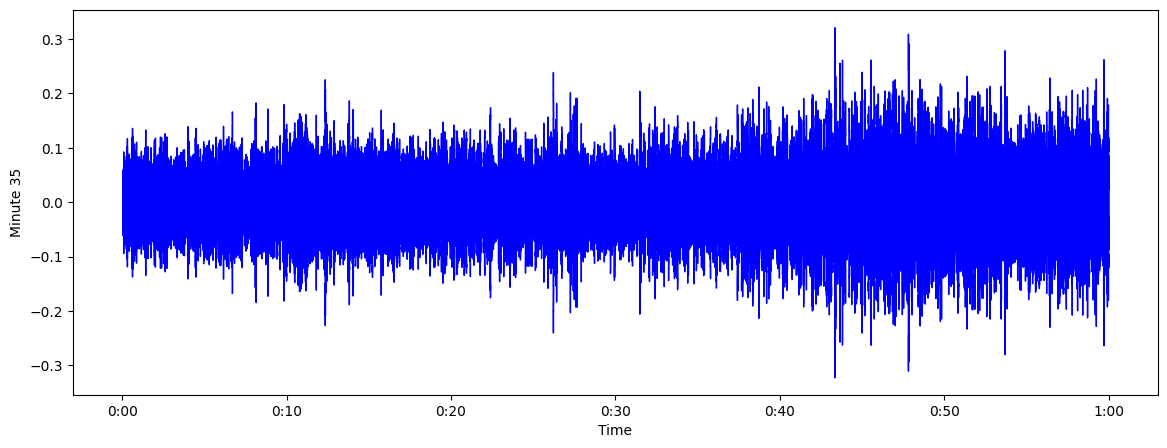

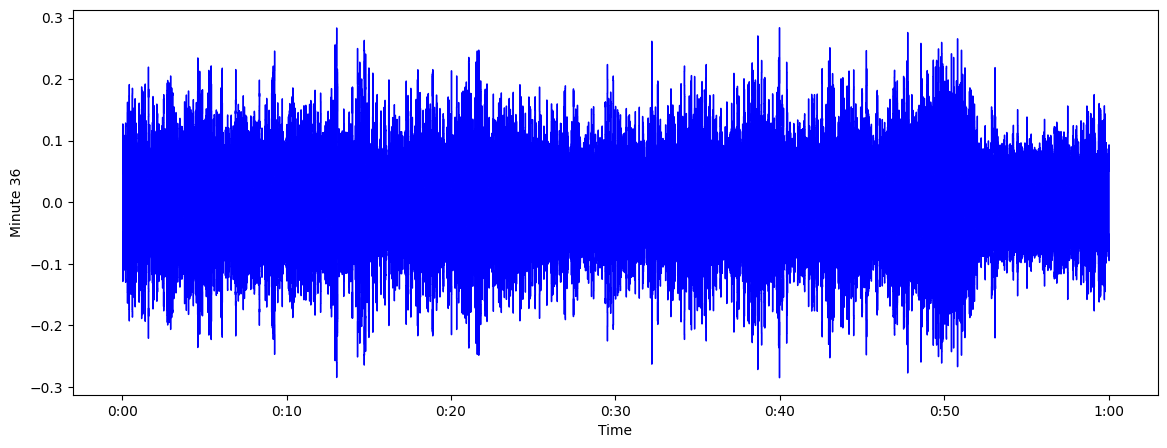

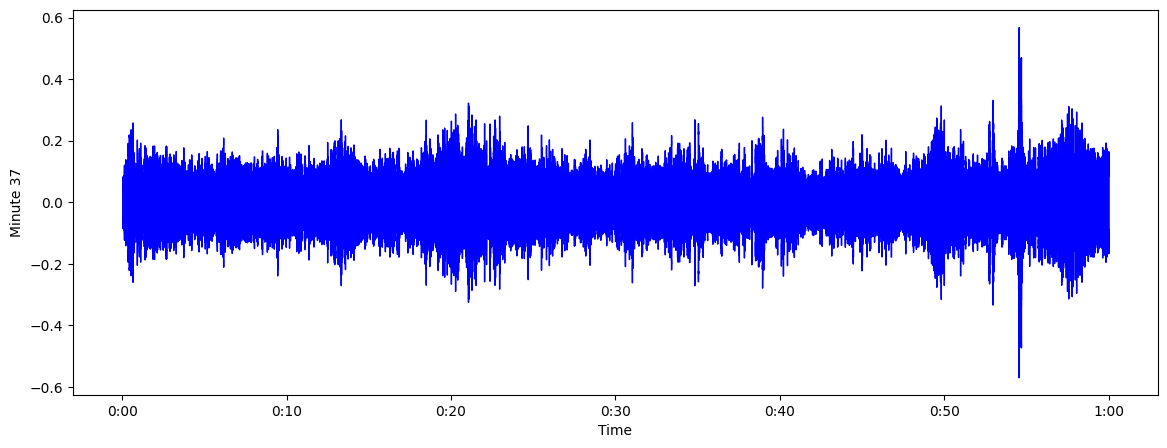

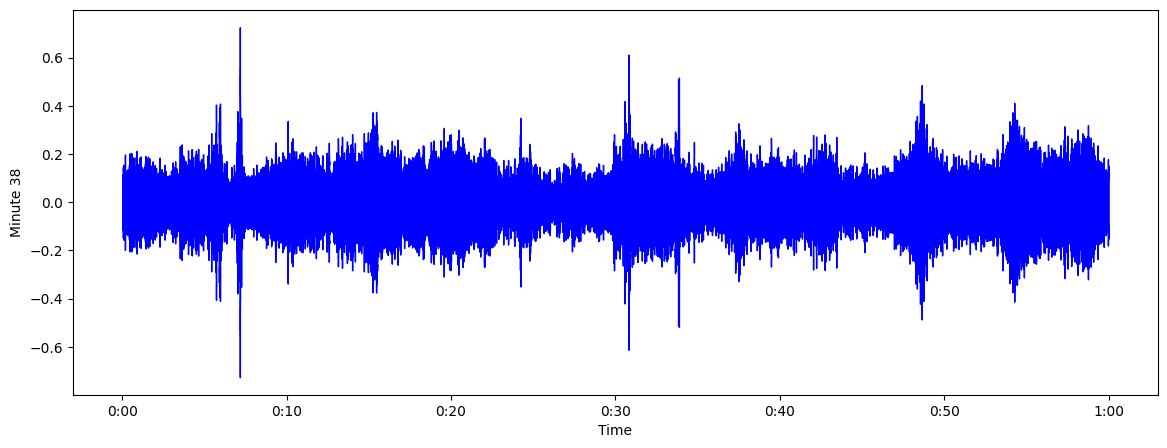

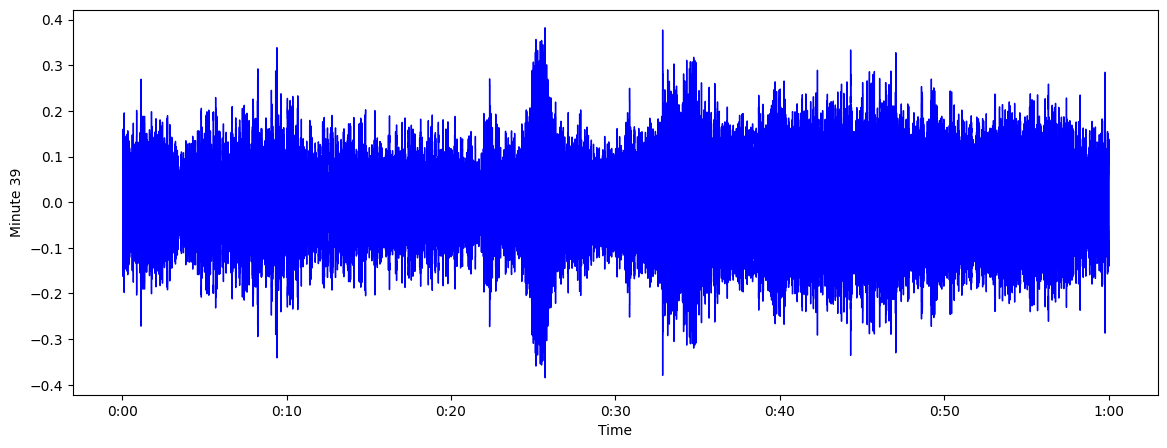

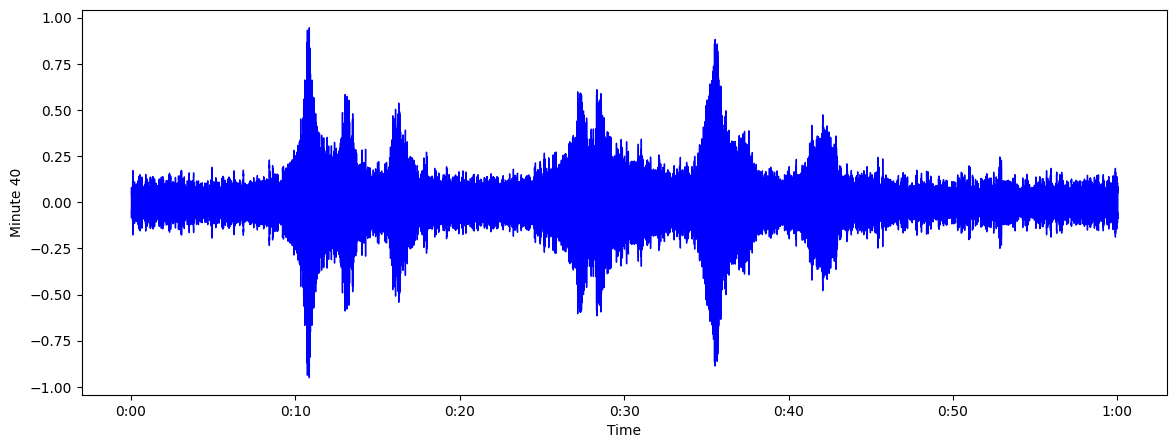

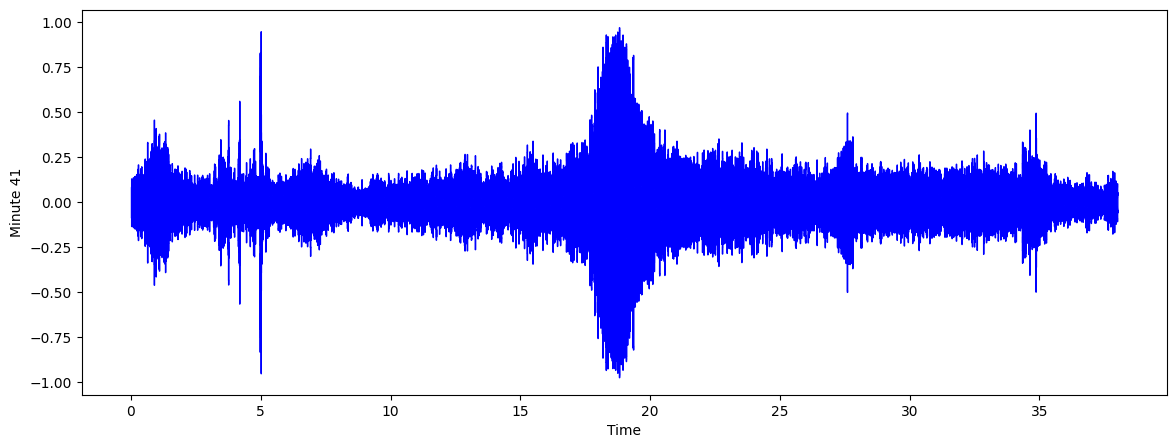

In [26]:
wave_forms = np.zeros(42)
min = 0
for i,v in enumerate(wave_forms):
    current_sample = int((i + 1) * minsample)
    prev_sample = int(current_sample - minsample)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x[prev_sample:current_sample], sr=sr, color="blue")
    plt.ylabel('Minute '+ str(min))
    min = min + 1